In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("Superstore Sales Dataset.csv")

In [125]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,NaT,NaN
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15,208.0


In [127]:
df.duplicated().sum()

0

In [129]:
df.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Ship Date                0
Ship Mode                0
Customer ID              0
Customer Name            0
Segment                  0
Country                  0
City                     0
State                    0
Postal Code              0
Region                   0
Product ID               0
Category                 0
Sub-Category             0
Product Name             0
Sales                    0
Quarter                  0
Shipping Time            0
Year                     0
previous_order_date    793
days_between_orders    793
dtype: int64

In [131]:
df_fill=df['Postal Code'].fillna(0)

In [133]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Shipping Time,Year,previous_order_date,days_between_orders
count,9800.000000,9800,9800,9800.000000,9800.000000,9800.000000,9800.000000,9007,9007.000000
mean,4900.500000,2017-03-18 06:23:39.428571392,2017-05-17 03:46:08.326530560,55211.280918,230.769059,59.890612,2016.724184,2017-02-05 10:26:04.383257344,87.794826
min,1.000000,2015-01-02 00:00:00,2015-01-15 00:00:00,0.000000,0.444000,0.000000,2015.000000,2015-01-02 00:00:00,0.000000
25%,2450.750000,2016-04-03 06:00:00,2016-06-23 00:00:00,23223.000000,17.248000,4.000000,2016.000000,2016-02-22 12:00:00,0.000000
50%,4900.500000,2017-04-23 00:00:00,2017-07-21 00:00:00,57551.000000,54.490000,7.000000,2017.000000,2017-03-11 00:00:00,0.000000
75%,7350.250000,2018-03-13 00:00:00,2018-06-05 00:00:00,90008.000000,210.605000,120.000000,2018.000000,2018-02-04 00:00:00,117.000000
max,9800.000000,2018-12-30 00:00:00,2019-05-01 00:00:00,99301.000000,22638.480000,321.000000,2018.000000,2018-12-30 00:00:00,1385.000000
std,2829.160653,NaN,NaN,32076.677954,626.651875,74.886902,1.123984,NaN,157.831494


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 2229 to 8341
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9800 non-null   int64         
 1   Order ID             9800 non-null   object        
 2   Order Date           9800 non-null   datetime64[ns]
 3   Ship Date            9800 non-null   datetime64[ns]
 4   Ship Mode            9800 non-null   object        
 5   Customer ID          9800 non-null   object        
 6   Customer Name        9800 non-null   object        
 7   Segment              9800 non-null   object        
 8   Country              9800 non-null   object        
 9   City                 9800 non-null   object        
 10  State                9800 non-null   object        
 11  Postal Code          9800 non-null   int32         
 12  Region               9800 non-null   object        
 13  Product ID           9800 non-null 

In [137]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='mixed')

In [139]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,NaT,NaN
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15,208.0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 2229 to 8341
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9800 non-null   int64         
 1   Order ID             9800 non-null   object        
 2   Order Date           9800 non-null   datetime64[ns]
 3   Ship Date            9800 non-null   datetime64[ns]
 4   Ship Mode            9800 non-null   object        
 5   Customer ID          9800 non-null   object        
 6   Customer Name        9800 non-null   object        
 7   Segment              9800 non-null   object        
 8   Country              9800 non-null   object        
 9   City                 9800 non-null   object        
 10  State                9800 non-null   object        
 11  Postal Code          9800 non-null   int32         
 12  Region               9800 non-null   object        
 13  Product ID           9800 non-null 

In [143]:
df["Quarter"]=df['Order Date'].dt.to_period('Q')

In [145]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,NaT,NaN
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15,208.0


In [147]:
df = df.fillna(0)

In [149]:
df.isnull().sum()

Row ID                 0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Postal Code            0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quarter                0
Shipping Time          0
Year                   0
previous_order_date    0
days_between_orders    0
dtype: int64

In [151]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [153]:
df['Postal Code']=df['Postal Code'].round().astype(int)

In [155]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [157]:
df['Shipping Time']=(df['Ship Date']-df['Order Date']).dt.days

In [159]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [161]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [163]:
df['Shipping Time']=(df['Ship Date']-df['Order Date']).dt.days

In [165]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [167]:
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')
df['Ship Date'] = df['Ship Date'].dt.strftime('%Y-%m-%d')


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 2229 to 8341
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype        
---  ------               --------------  -----        
 0   Row ID               9800 non-null   int64        
 1   Order ID             9800 non-null   object       
 2   Order Date           9800 non-null   object       
 3   Ship Date            9800 non-null   object       
 4   Ship Mode            9800 non-null   object       
 5   Customer ID          9800 non-null   object       
 6   Customer Name        9800 non-null   object       
 7   Segment              9800 non-null   object       
 8   Country              9800 non-null   object       
 9   City                 9800 non-null   object       
 10  State                9800 non-null   object       
 11  Postal Code          9800 non-null   int32        
 12  Region               9800 non-null   object       
 13  Product ID           9800 non-null   object       

In [171]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed')
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='mixed')

In [173]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [175]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [177]:
wrong_dates = df['Ship Date'] < df['Order Date']

In [179]:
df.loc[wrong_dates, ['Order Date', 'Ship Date']] = df.loc[wrong_dates, ['Ship Date', 'Order Date']].values

In [181]:
df['Shipping Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [183]:
print(df[['Order Date', 'Ship Date', 'Shipping Time']].head())

     Order Date  Ship Date  Shipping Time
2229 2015-03-31 2015-05-04             34
2230 2015-03-31 2015-05-04             34
7468 2015-09-15 2015-09-20              5
7469 2015-09-15 2015-09-20              5
1299 2016-04-10 2016-07-10             91


In [185]:
df['Shipping Time'].mean()

59.89061224489796

In [187]:
Max_quarter=df.groupby('Quarter')['Sales'].sum().sort_values(ascending=False).reset_index()

In [189]:
Max_quarter

,Quarter,Sales
0,2018Q1,227968.9262
1,2018Q3,190698.8065
2,2017Q1,182803.6563
3,2018Q4,163650.1520
4,2017Q2,156218.8368
5,2017Q4,141381.3820
6,2018Q2,139734.1345
7,2016Q3,130290.8150
8,2015Q3,129762.3128
9,2015Q1,127848.4935


In [191]:
df['Year']=df['Order Date'].dt.year

In [193]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,0,0.0
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31 00:00:00,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31 00:00:00,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15 00:00:00,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15 00:00:00,208.0


In [195]:
Max_quarter=df.groupby('Quarter')['Sales'].sum().reset_index()

In [197]:
Max_quarter


,Quarter,Sales
0,2015Q1,127848.4935
1,2015Q2,95398.8256
2,2015Q3,129762.3128
3,2015Q4,126846.5762
4,2016Q1,123361.2015
5,2016Q2,95912.3222
6,2016Q3,130290.8150
7,2016Q4,109871.6667
8,2017Q1,182803.6563
9,2017Q2,156218.8368


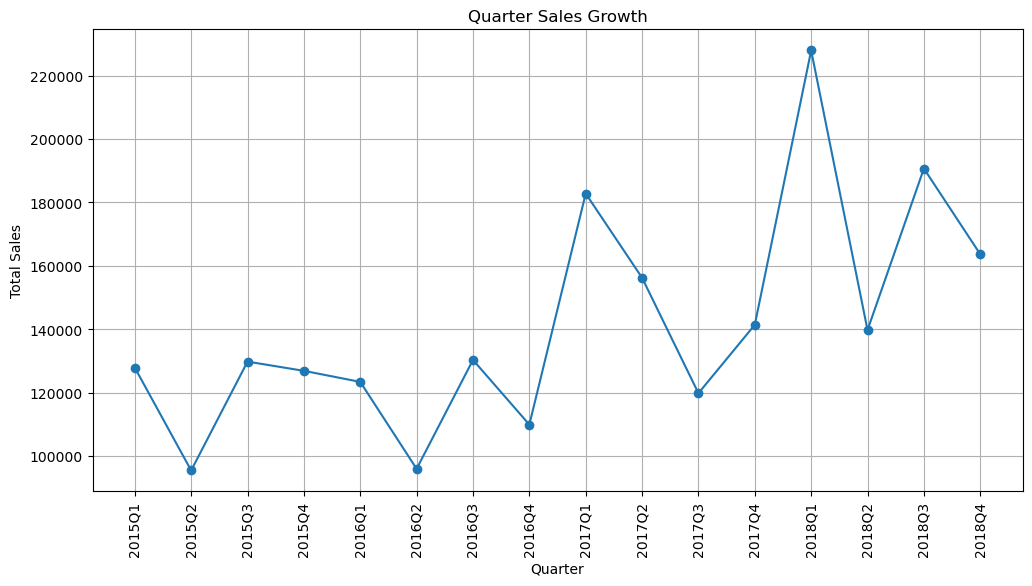

In [199]:
plt.figure(figsize=(12,6))
plt.plot(Max_quarter['Quarter'].astype(str),Max_quarter['Sales'],marker='o')
plt.title('Quarter Sales Growth')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [201]:
order_frequency=df.groupby('Customer ID').size().reset_index(name='order_count')

In [203]:
order_frequency

,Customer ID,order_count
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


In [205]:
repeat_customers=order_frequency [order_frequency['order_count']>1]

In [207]:
df = df.sort_values(by=['Customer ID', 'Order Date'])
df['previous_order_date'] = df.groupby('Customer ID')['Order Date'].shift(1)
df['days_between_orders'] = (df['Order Date'] - df['previous_order_date']).dt.days


In [209]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,NaT,NaN
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15,208.0


In [211]:
avg_time_between_orders = df.groupby('Customer ID')['days_between_orders'].mean().reset_index(name='avg_days_between_orders')


In [213]:
avg_time_between_orders

,Customer ID,avg_days_between_orders
0,AA-10315,110.300000
1,AA-10375,92.928571
2,AA-10480,100.545455
3,AA-10645,71.470588
4,AB-10015,193.200000
...,...,...
788,XP-21865,51.740741
789,YC-21895,162.142857
790,YS-21880,97.090909
791,ZC-21910,32.666667


In [215]:
customer_analysis = pd.merge(order_frequency, avg_time_between_orders, on='Customer ID')

In [217]:
customer_analysis

,Customer ID,order_count,avg_days_between_orders
0,AA-10315,11,110.300000
1,AA-10375,15,92.928571
2,AA-10480,12,100.545455
3,AA-10645,18,71.470588
4,AB-10015,6,193.200000
...,...,...,...
788,XP-21865,28,51.740741
789,YC-21895,8,162.142857
790,YS-21880,12,97.090909
791,ZC-21910,31,32.666667


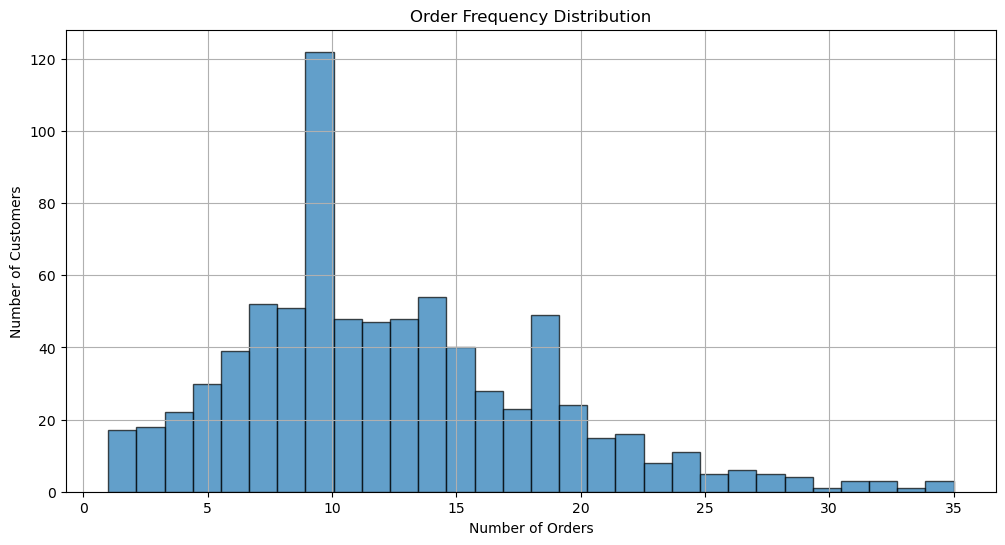

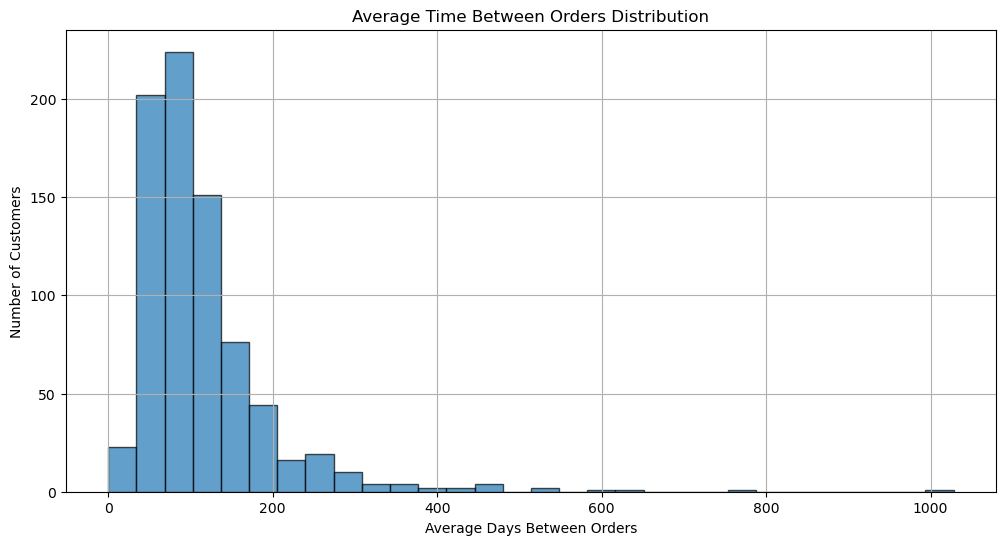

In [219]:

plt.figure(figsize=(12, 6))
plt.hist(customer_analysis['order_count'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Order Frequency Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(customer_analysis['avg_days_between_orders'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Average Time Between Orders Distribution')
plt.xlabel('Average Days Between Orders')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


In [221]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Shipping Time,Year,previous_order_date,days_between_orders
2229,2230,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2015Q1,34,2015,NaT,NaN
2230,2231,CA-2015-128055,2015-03-31,2015-05-04,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2015Q1,34,2015,2015-03-31,0.0
7468,7469,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,14.940,2015Q3,5,2015,2015-03-31,168.0
7469,7470,CA-2015-138100,2015-09-15,2015-09-20,Standard Class,AA-10315,Alex Avila,Consumer,United States,New York City,...,FUR-FU-10002456,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2015Q3,5,2015,2015-09-15,0.0
1299,1300,CA-2016-121391,2016-04-10,2016-07-10,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2016Q2,91,2016,2015-09-15,208.0


In [223]:
Max_city=df.groupby('City')['Sales'].sum().reset_index()

In [225]:
Top_10_City=Max_city.sort_values(by='Sales',ascending=False).head(10)

In [227]:
Max_category=df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

In [229]:
Max_category.head()

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


In [61]:
max_values = df.groupby(['City', 'Category'])['Sales'].max(8).reset_index()

In [62]:
max_values

,City,Category,Sales
0,Aberdeen,Office Supplies,25.500
1,Abilene,Office Supplies,1.392
2,Akron,Furniture,284.364
3,Akron,Office Supplies,665.408
4,Akron,Technology,323.982
...,...,...,...
1181,York,Furniture,422.058
1182,York,Office Supplies,254.352
1183,Yucaipa,Office Supplies,50.800
1184,Yuma,Office Supplies,44.856


C:\Users\2024\AppData\Local\Temp\ipykernel_18524\2310768259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='City', data=Top_10_City, palette='viridis')


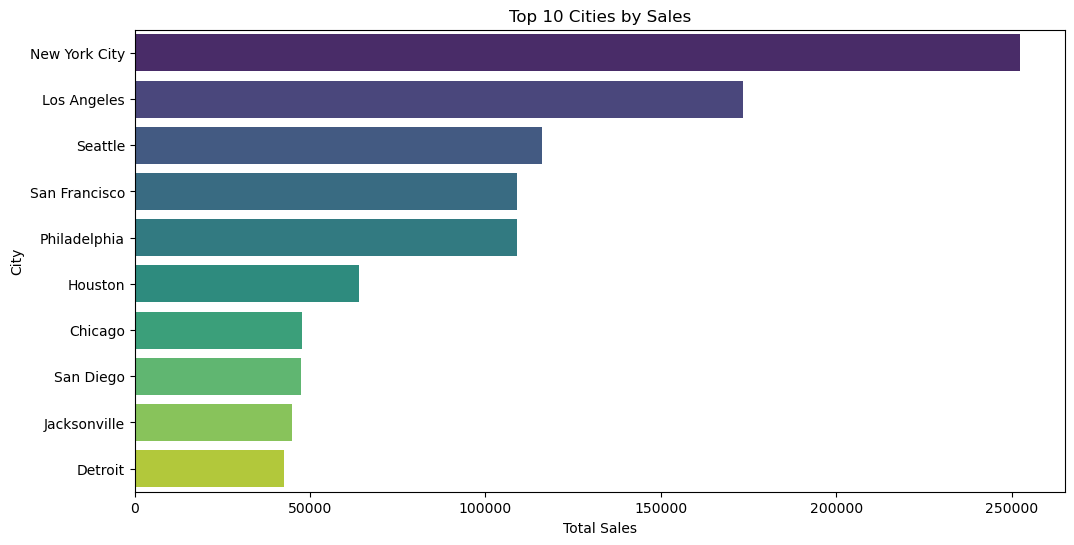

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='City', data=Top_10_City, palette='viridis')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()


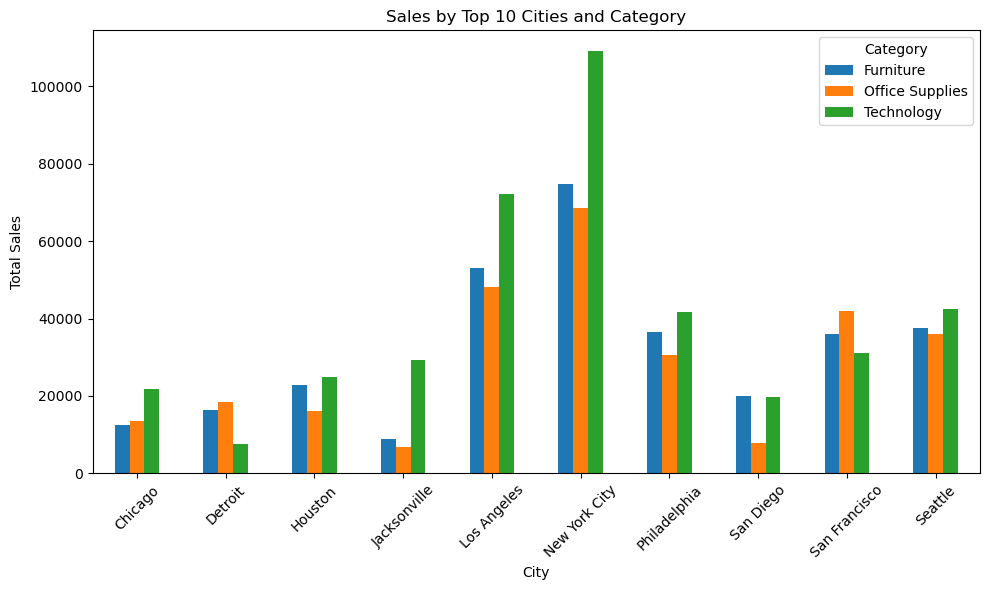

In [233]:

city_category_sales = df.groupby(['City', 'Category'])['Sales'].sum().reset_index()

top_cities = city_category_sales.groupby('City')['Sales'].sum().nlargest(10).index

top_city_category_sales = city_category_sales[city_category_sales['City'].isin(top_cities)]

pivot_table = top_city_category_sales.pivot(index='City', columns='Category', values='Sales')

pivot_table.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Total Sales')
plt.title('Sales by Top 10 Cities and Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


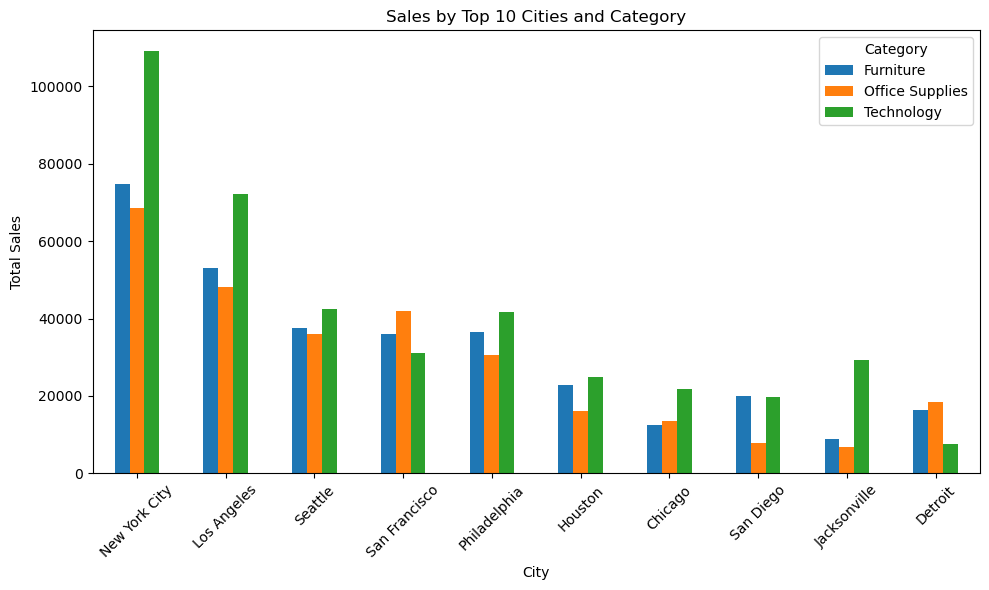

In [235]:
###Sorted Pivot
city_category_sales = df.groupby(['City', 'Category'])['Sales'].sum().reset_index()

top_cities = city_category_sales.groupby('City')['Sales'].sum().nlargest(10).index

top_city_category_sales = city_category_sales[city_category_sales['City'].isin(top_cities)]

pivot_table = top_city_category_sales.pivot(index='City', columns='Category', values='Sales')

pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False).drop(columns='Total')

pivot_table.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Total Sales')
plt.title('Sales by Top 10 Cities and Category')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
